<a href="https://colab.research.google.com/github/dennisorellana2/self-learning-fundamentals/blob/master/Netflix_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load pandas library
import pandas as pd

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving netflix_titles_nov_2019.csv to netflix_titles_nov_2019 (1).csv
User uploaded file "netflix_titles_nov_2019.csv" with length 2192197 bytes


In [3]:
# read  the dataset from working directory 
ndata = pd.read_csv('netflix_titles_nov_2019.csv')

In [4]:
# show the data columns
ndata.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [5]:
# listing the frst 100 rows of the dataset and creat a new variable as ndata2
ndata2 = ndata.head(100)

In [6]:
# single column
ndata['title']

0                                 Chocolate
1       Guatemala: Heart of the Mayan World
2                           The Zoya Factor
3                                 Atlantics
4                           Chip and Potato
                       ...                 
5832            Mad Ron's Prevues from Hell
5833                               Splatter
5834                Just Another Love Story
5835                        Dinner for Five
5836                   To and From New York
Name: title, Length: 5837, dtype: object

In [7]:
# row selection 
ndata[0:100]


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30-Nov-19,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,30-Nov-19,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30-Nov-19,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",29-Nov-19,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
95,70044686,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Movie
96,81073633,Iliza Shlesinger: Unveiled,Steve Paley,Iliza Shlesinger,United States,19-Nov-19,2019,TV-MA,78 min,Stand-Up Comedy,"Here comes the bride, and she's got plenty to ...",Movie
97,81152642,Miss Culinary,NaN,"Wanida Termthanaporn, Jason Young, Thanawin Te...",NaN,19-Nov-19,2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",After ditching her domestic life to become a c...,TV Show
98,81105522,No Time for Shame,NaN,Santiago Artemis,Argentina,19-Nov-19,2019,TV-MA,1 Season,"International TV Shows, Reality TV, Spanish-La...","Follow Santiago Artemis, a Buenos Aires fashio...",TV Show


In [8]:
# multiple columns
tryt = ndata[['title','release_year','type']]

In [9]:
# multiple columns with the first 100 indexes
tryt2 = ndata.loc[0:100, ['title','release_year','type']]

In [10]:
# multiple columns with the first 100 rows and first 3 columns
tryt3 = ndata.iloc[0:100, 0:3]

In [11]:
# dropping columns 
ndata_nodate_added = ndata.drop('date_added', axis = 1)

In [12]:
 # column creation
ndata['age'] = 2019 - ndata['release_year']

In [13]:
# recenlty new movies and shows age <=1  filtering by this criteria 
ndata_new_netflix = ndata[ndata.age <= 1]

ndata.loc[ndata.age <= 1, :]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,age
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30-Nov-19,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,30-Nov-19,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30-Nov-19,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",29-Nov-19,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,70304246,Eastsiders,NaN,"Kit Williamson, Van Hansis, Constance Wu, Matt...",United States,NaN,2018,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Cal turns to his friends for help through a hi...,TV Show,1
3884,80041601,Lovesick,NaN,"Johnny Flynn, Antonia Thomas, Daniel Ings, Han...",United Kingdom,NaN,2018,TV-MA,3 Seasons,"British TV Shows, International TV Shows, Roma...","In his quest for true love, Dylan found chlamy...",TV Show,1
3915,80194813,We Speak Dance,NaN,Vandana Hart,United States,1-Jan-18,2018,TV-14,1 Season,Docuseries,Trained dancer Vandana Hart travels the world ...,TV Show,1
4575,80190946,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,1-Jul-17,2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,Movie,1


In [14]:
# dummy variables
data_dummies = pd.get_dummies(ndata[['listed_in','description','type']].head(1000))

In [15]:
# pivot tables
pd.pivot_table (ndata, index = 'release_year', columns = 'type', \
     values='age', aggfunc = 'count').sort_index (ascending=False)
     
pd.pivot_table (ndata, index = 'release_year', columns = 'type', \
     values='age', aggfunc = 'mean').sort_index (ascending=False)  

type,Movie,TV Show
release_year,,
2020,NaN,-1.0
2019,0.0,0.0
2018,1.0,1.0
2017,2.0,2.0
2016,3.0,3.0
...,...,...
1945,74.0,NaN
1944,75.0,NaN
1943,76.0,NaN


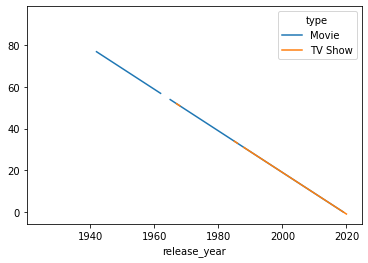

In [16]:
 # pivot table with plot  
pd.pivot_table (ndata, index = 'release_year', columns = 'type', \
     values='age', aggfunc = 'mean').sort_index (ascending=False).plot()

In [17]:
# groupby
grouped_data = ndata.groupby(['type','age'], as_index = False).mean() 

In [18]:
# pd.merge == sql join
df1 = ndata[['title','rating']]
df2 = ndata[['rating','age']]

df_joined = pd.merge(df1,df2, on= 'rating')

In [19]:
# appendning 
samp1 = ndata.sample(100, random_state= 1)
samp2 = ndata.sample(100, random_state = 2)

samp1.append(samp2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,age
3215,80997770,The Vietnam War: A Film by Ken Burns and Lynn ...,"Ken Burns, Lynn Novick",NaN,United States,20-Jun-18,2017,TV-MA,1 Season,Docuseries,"Ken Burns presents an epic 10-part, 18-hour ch...",TV Show,2
687,80148535,The Dark Crystal: Age of Resistance,NaN,"Taron Egerton, Nathalie Emmanuel, Anya Taylor-...","United Kingdom, United States",30-Aug-19,2019,TV-PG,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",As power-hungry overlords drain life from the ...,TV Show,0
3759,70045919,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,1-Feb-18,2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an...",Movie,14
3878,80074065,Hum Saath-Saath Hain,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,1-Jan-18,1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...,Movie,20
1256,80133311,Riverdale,Rob Seidenglanz,"K.J. Apa, Lili Reinhart, Camila Mendes, Cole S...",United States,NaN,2019,TV-14,3 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","While navigating the troubled waters of sex, r...",TV Show,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,81006826,Franco Escamilla: Bienvenido al mundo,Ulises Valencia,Franco Escamilla,Mexico,17-Apr-19,2019,TV-MA,54 min,Stand-Up Comedy,Comedian Franco Escamilla shares stories about...,Movie,0
640,60000861,American Psycho,Mary Harron,"Christian Bale, Willem Dafoe, Jared Leto, Rees...","United States, Canada",1-Sep-19,2000,R,102 min,"Comedies, Cult Movies, Dramas",With chiseled good looks that belie his insani...,Movie,19
5308,80133781,Bromance,NaN,"Baron Chen, Megan Lai, Bii, Katie Chen, Sean Lee",Taiwan,1-Dec-16,2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Ya-nuo's been raised as a boy. Now at age 25, ...",TV Show,4
2349,80991809,Time Share,Sebastián Hofmann,"Luis Gerardo Méndez, Miguel Rodarte, R.J. Mitt...","Mexico, Netherlands",30-Nov-18,2018,TV-MA,96 min,"Dramas, Independent Movies, International Movies",Husband and father Pedro becomes increasingly ...,Movie,1


In [20]:
# write to csv
ndata.head(1000).to_csv('top1000.csv')